## 3-1. 단어 빈도 그래프 - 많이 쓰인 단어는?
일반인들이 텍스트 분석이라는 이름으로 흔히 접하게 되는 것은 빈도를 바탕으로 한 그래프와 워드 클라우드인 경우가 많다. 텍스트 분석에서 가장 단순하고 기본적인 아이디어는 하나 혹은 여러 개의 문서에서 가장 많이 사용된 단어를 파악하는 것으로, 이것만으로도 상당히 많은 정보를 얻을 수 있다.

단어 빈도 그래프를 그리려면 먼저 단어의 빈도를 구해야 한다. 그러나 그보다 먼저 문서들로부터 각 단어들을 분리해내야 하는데, 이를 위해 토큰화, 스테밍(어간 추출), 불용어 등을 모두 이용한다. [구텐베르크 프로젝트(Project Gutenberg)](https://www.gutenberg.org/)는 저작권이 만료된 영어 소설들을 제공하는데, 해당 사이트에 가면 60,000개의 무료 eBook을 다운로드받아 볼 수 있으므로 텍스트 마이닝 연습에 활용하기를 추천한다. NLTK는 패키지 안에서 아래 예시와 같이 구텐베르크 프로젝트의 일부 책들을 제공한다.

In [1]:
import nltk

nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SystemsAnalysisLab\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package gutenberg is already up-to-date!


True

In [2]:
from nltk.corpus import gutenberg

file_names = gutenberg.fileids() # 파일 제목을 읽어 온다
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


gutenberg.open(파일 제목)으로 해당 파일을 열 수 있으며, read()로 그 내용을 읽어올 수 있다.

In [3]:
doc_alice = gutenberg.open('carroll-alice.txt').read()

print('# Num of characters used:', len(doc_alice)) # 사용된 문자의 수
print()
print('# Text sample:')
print(doc_alice[:500]) # 앞 500자만 출력

# Num of characters used: 144395

# Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


내용을 확인하고 NLTK를 이용해 토큰화한다. 토큰 수와 앞 20개의 토큰을 확인하고 위에서 본 앞부분 내용과 비교해본다.

In [4]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice) # 토큰화 실행

print('# Num of tokens used:', len(tokens_alice))
print()
print('# Token sample:')
print(tokens_alice[:20])

# Num of tokens used: 33494

# Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


포터 스테머로 스테밍하고, 토큰 수와 앞 20개의 토큰을 확인한다.

In [5]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice] # 모든 토큰에 대해 스테밍 실행

print('# Num of tokens after stemming:', len(stem_tokens_alice))
print()
print('# Token sample:')
print(stem_tokens_alice[:20])

# Num of tokens after stemming: 33494

# Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


WordNetLemmatizer를 이용해 표제어를 추출하고, 토큰 수와 앞 20개의 토큰을 스테밍 결과와 비교해본다.

In [6]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice] # 모든 토큰에 대해 스테밍 실행

print('# Num of tokens after lemmatization:', len(lem_tokens_alice))
print()
print('# Token sample:')
print(lem_tokens_alice[:20])

# Num of tokens after lemmatization: 33494

# Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


위 결과들을 종합적으로 볼 때, 어간 추출이든 표제어 추출이든 토큰 수는 변하지 않는다. 이는 토큰화한 결과에 대해 개별적으로 어간 추출과 표제어 추출을 수행하기 때문에 당연히 그렇다는 것을 알 수 있다. 

이번에는 정규표현식을 이용해 토큰화를 하고 결과를 비교해본다.

In [7]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('# Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print()
print('# Token sample:')
print(reg_tokens_alice[:20])

# Num of tokens with RegexpTokenizer: 21616

# Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


[, ],'와 같은 부호가 사라졌을 뿐 아니라 2자 이하의 글자들이 모두 제외됐기 때문에 WordTokenizer를 사용했을 때보다 토큰 수가 현저히 줄어든 것을 볼 수 있다. 부호는 목적에 따라 의미를 가질 수도 있고 아닐 수도 있어, 부호를 포함할지 말지는 전적으로 텍스트 마이닝을 수행하는 사람의 판단에 달려 있다. 여기서는 RegexpTokenizer의 결과를 사용하기로 하고 결과에서 불용어를 제거한다. 그리고 분석 목적이 그래프를 이용한 시각화이므로 단어를 알아보기 쉽도록 스테밍은 하지 않기로 한다.

In [8]:
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))

result_alice = [word for word in reg_tokens_alice if word not in english_stops] # stopwords를 제외한 단어들만으로 리스트를 생성

print('# Num of tokens after stopword elimination:', len(result_alice))
print()
print('# Token sample:')
print(result_alice[:20])

# Num of tokens after stopword elimination: 12999

# Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


텍스트 전처리가 완료됐으므로 각 단어별 빈도를 계산한다. 다양한 방법이 있으나, 여기서는 딕셔너리로 단어별 개수를 세고 빈도가 큰 순으로 정렬한다.

In [9]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('# Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print()
print('# Top 20 high frequency words:')
for key in sorted_word_count[:20]: # 빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

# Num of used words: 2687

# Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

빈도가 높은 상위 20개 단어를 보면 'would', 'could', 'and'와 같은 단어는 딱히 필요하지 않은 단어처럼 보인다. 따라서 품사 태깅을 이용해 의미가 있을 것으로 생각되는 명사, 동사, 형용사만 추출해본다. 범위를 어디까지 할지는 실행하는 사람의 판단으로, 빈도가 높은 단어들을 면밀히 살펴보고 결정해야 한다. 앞 장과 위의 코드를 적절히 조합해 아래와 같이 실행한다.

In [10]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('# Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print()
print('# Top 20 high frequency words:')
for key in sorted_word_count[:20]: # 빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

# Num of used words: 1726

# Top 20 high frequency words:
'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

결과가 아주 만족스럽지는 않으나, 이제 그래프를 이용해 시각화해본다.

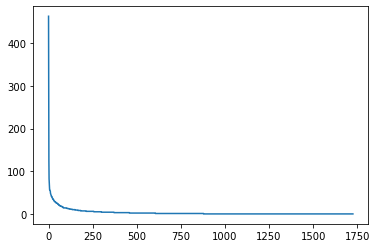

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [alice_word_count[key] for key in sorted_word_count] # 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성

plt.plot(w)
plt.show()

위 그래프에는 많은 문제점이 있는데, 우선 무슨 단어인지 보이지가 않는다. 그래프에 표시된 단어가 너무 많아서 단어를 출력하더라도 가독성이 전혀 없을 수밖에 없다. 이를 해결하려면 상위 빈도수 단어에 대해서만 그래프를 그려야 한다. 위 그래프의 모양은 빈도수에 따라 정렬된 단어의 순위와 빈도수가 극단적으로 반비례하는 것을 보여준다. 즉, 상위 몇 개의 단어는 빈도수가 매우 높지만 순위가 100위만 넘어가도 매우 적은 빈도수가 된다. 우리는 글을 쓸 때 자주 사용하는 단어만 주로 쓰는 경향이 있고, 위 그래프를 볼 때 거의 90%의 단어는 사용되는 빈도가 비슷한 정도로 낮다. 나중에 우리가 문서를 분류하는 작업을 할 때 이와 같은 성질이 문제가 된다. 일부 단어의 빈도가 너무 높아서 이 단어들이 미치는 영향이 다른 단어에 비해 훨씬 커지는 결과가 발생한다. 말뭉치의 단어들을 사용 빈도가 높은 순서대로 나열하면 단어의 빈도는 단어의 순위에 반비례한다는 지프의 법칙(Zipf's law)은 이러한 현상을 설명해주는 법칙으로, 자연에서 발생하는 많은 현상이 이 법칙을 따른다.

우리는 지금 빈도가 높은 상위 단어들을 봄으로써 텍스트의 내용에 대한 통찰을 얻으려고 하는 것이므로, 아래와 같이 코드를 수정한다. 단어 빈도수에 대한 그래프를 그릴 때는 수평 막대그래프를 역순으로 정렬하여 이용해 아래와 같이 그려준다.

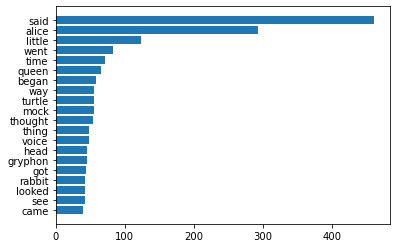

In [12]:
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = [alice_word_count[key] for key in n] # 20개 단어에 대한 빈도
plt.barh(range(len(n)), w, tick_label=n) # 수평 막대그래프
plt.show()